In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix

In [3]:
df=pd.read_csv("/content/Car Orice Prediction.zip")


In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [11]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [12]:
df.shape

(18924, 18)

In [14]:
for column in df.columns:
  print(column,":",df[column].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


In [15]:
df_int=df.select_dtypes(include=['int64','float64'])
df_int

,ID,Price,Prod. year,Cylinders,Airbags
0,45654403,13328,2010,6.0,12
1,44731507,16621,2011,6.0,8
2,45774419,8467,2006,4.0,2
3,45769185,3607,2011,4.0,0
4,45809263,11726,2014,4.0,4
...,...,...,...,...,...
19232,45798355,8467,1999,4.0,5
19233,45778856,15681,2011,4.0,8
19234,45804997,26108,2010,4.0,4
19235,45793526,5331,2007,4.0,4


In [16]:

cor=df_int.corr()
cor

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


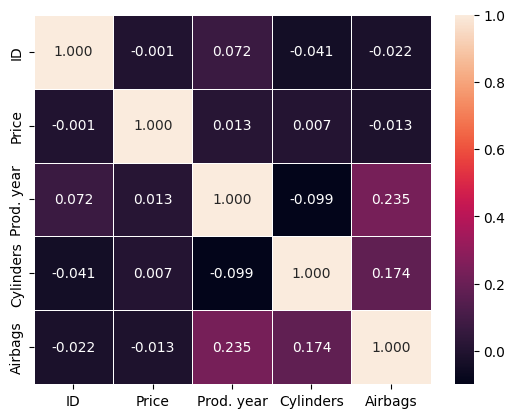

In [17]:
sns.heatmap(cor,annot=True,lw='0.5',fmt="0.3f")
plt.show()

In [18]:
df_obj=df.select_dtypes(include="object")
df_obj

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


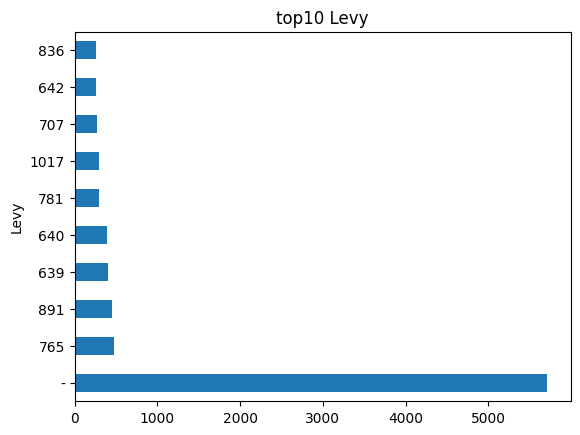

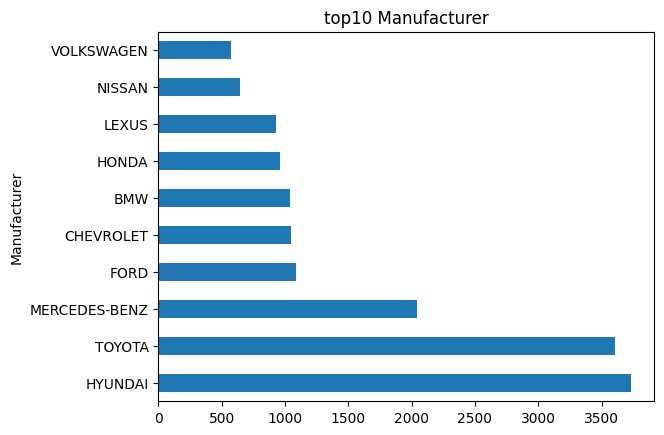

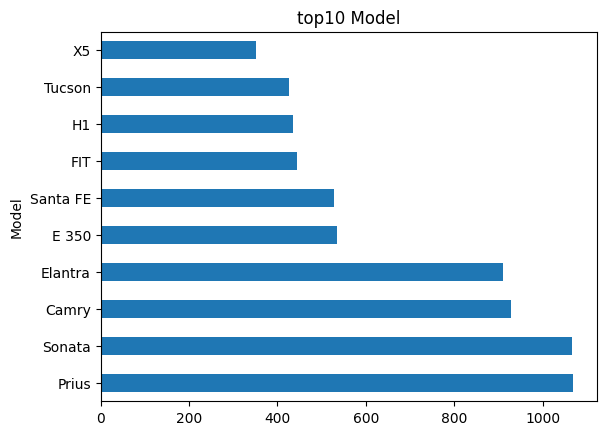

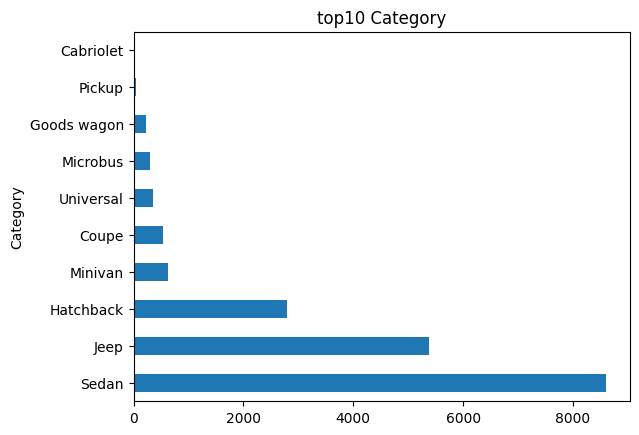

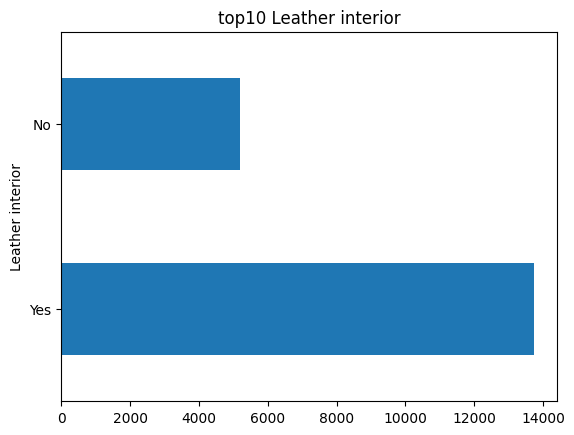

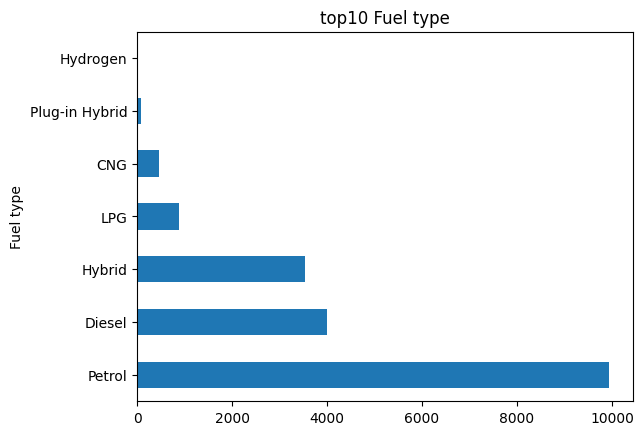

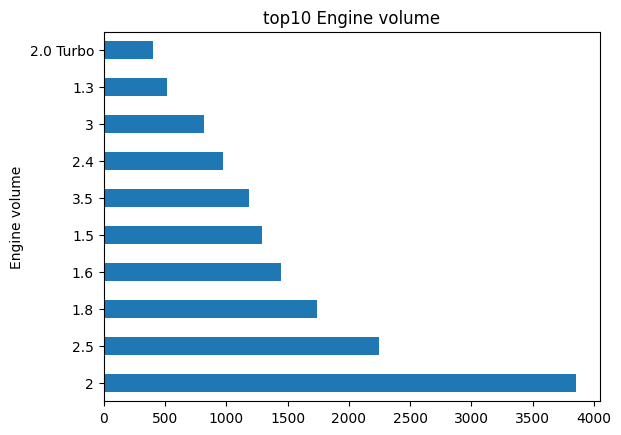

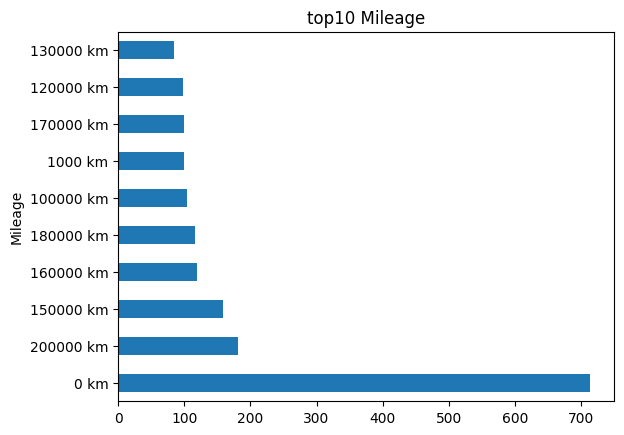

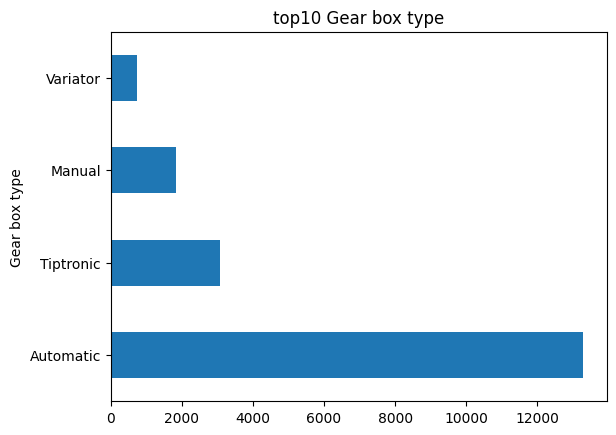

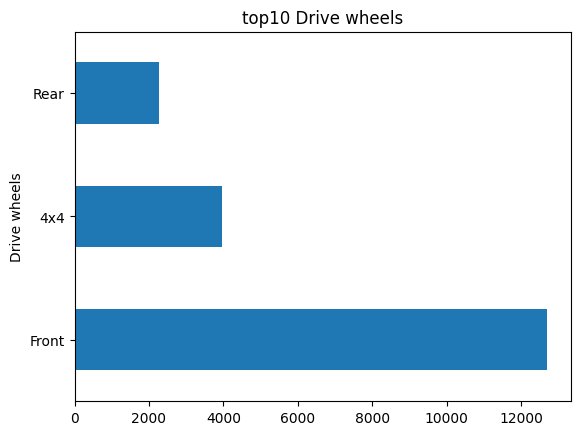

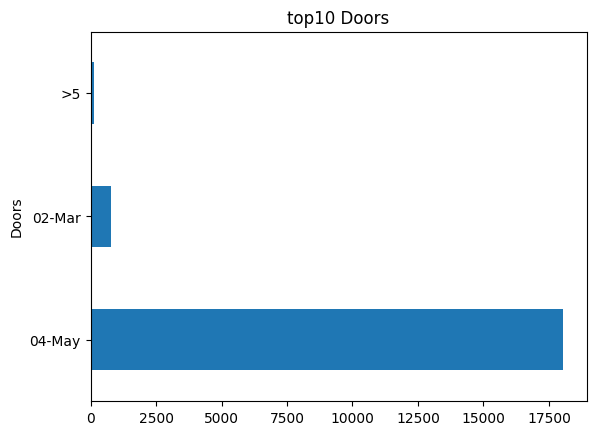

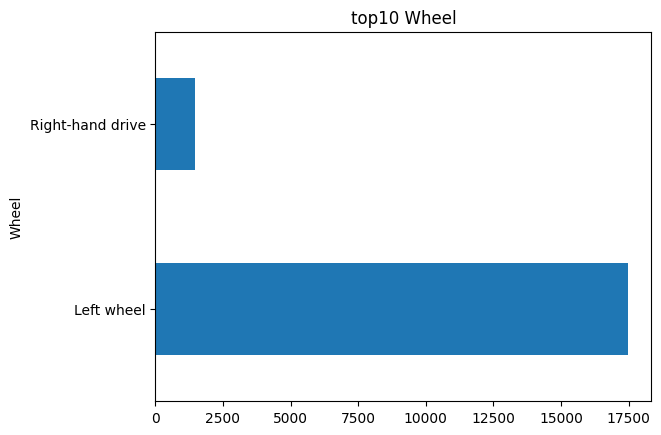

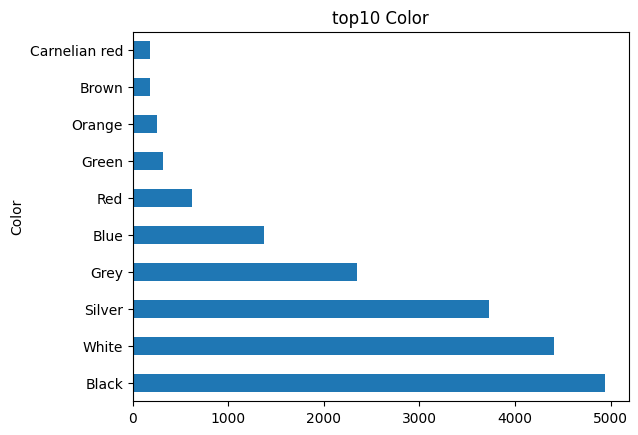

In [19]:
for col in df_obj:
    top10=df[col].value_counts()[:10]
    top10.plot(kind="barh")
    plt.title("top10"+" "+col)
    plt.show()

In [21]:
top10car=df["Manufacturer"].value_counts().sort_values(ascending=False)[:10]
top10car

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


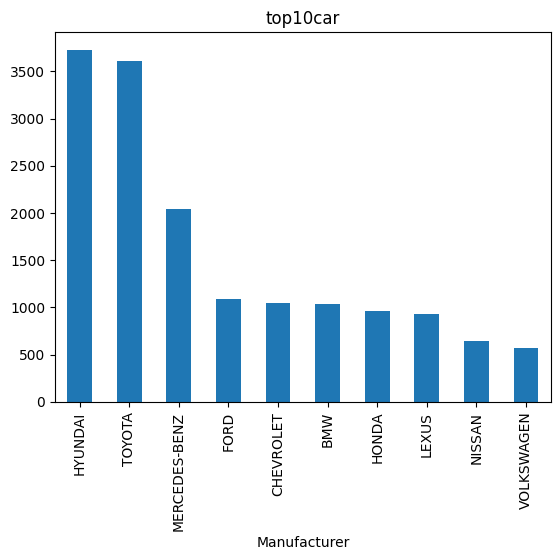

In [22]:
top10car.plot(kind="bar")
plt.title("top10car")
plt.show()

In [23]:
m_p=df.groupby(['Manufacturer'])['Price'].sum().sort_values(ascending=False)[:10]
m_p

,Price
Manufacturer,
HYUNDAI,83179077
TOYOTA,51574627
MERCEDES-BENZ,37980047
OPEL,29096058
BMW,21351409
LEXUS,18588755
FORD,16768093
CHEVROLET,15594933
HONDA,13595591


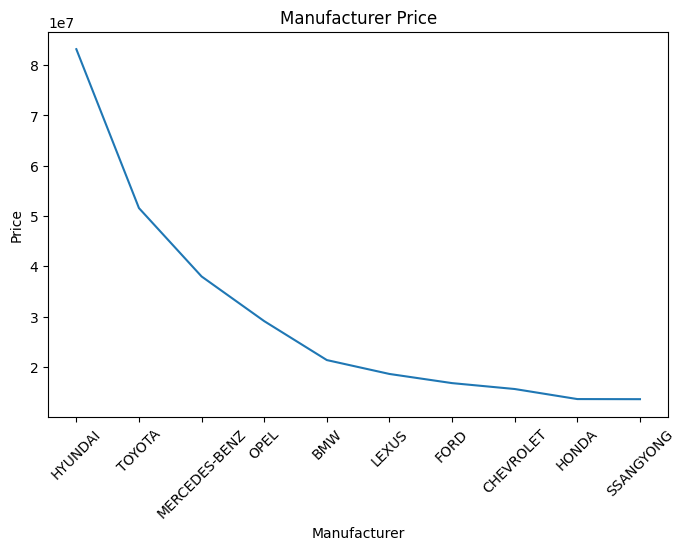

In [24]:
plt.figure(figsize = (8, 5))
plt.plot(m_p)
plt.xticks(rotation = 45)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Manufacturer Price')

plt.show()

In [25]:
Fuel_type_count=df["Fuel type"].value_counts()
Fuel_type_count

,count
Fuel type,
Petrol,9944
Diesel,4001
Hybrid,3539
LPG,885
CNG,469
Plug-in Hybrid,85
Hydrogen,1


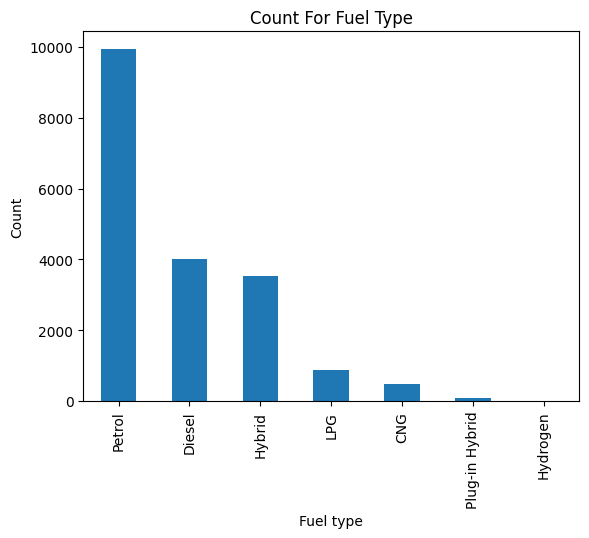

In [26]:
Fuel_type_count.plot(kind="bar")
plt.title("Count For Fuel Type")
plt.ylabel("Count")
plt.show()

In [27]:
pd.crosstab(df["Manufacturer"],df["Fuel type"])

Fuel type,CNG,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid
Manufacturer,,,,,,,
ACURA,0,0,0,0,0,15,0
ALFA ROMEO,0,0,0,0,0,4,0
ASTON MARTIN,0,0,0,0,0,1,0
AUDI,2,25,2,0,0,225,0
BENTLEY,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...
VAZ,5,1,0,0,0,41,0
VOLKSWAGEN,42,99,8,0,13,409,0
VOLVO,1,1,0,0,0,17,0


In [28]:
pd.crosstab(df["Category"],df["Fuel type"])

Fuel type,CNG,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid
Category,,,,,,,
Cabriolet,0,1,0,0,0,34,0
Coupe,7,32,11,0,3,475,0
Goods wagon,17,162,0,0,3,47,0
Hatchback,34,79,1289,0,38,1312,47
Jeep,136,2021,584,0,83,2552,2
Limousine,1,0,0,0,0,10,0
Microbus,5,283,0,0,1,10,0
Minivan,45,379,11,0,40,157,1
Pickup,0,27,0,0,2,22,0


In [29]:
pd.crosstab(df["Gear box type"],df["Fuel type"])

Fuel type,CNG,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid
Gear box type,,,,,,,
Automatic,158,3007,2865,0,738,6456,58
Manual,199,701,6,0,23,915,0
Tiptronic,106,293,240,1,107,2306,12
Variator,6,0,428,0,17,267,15


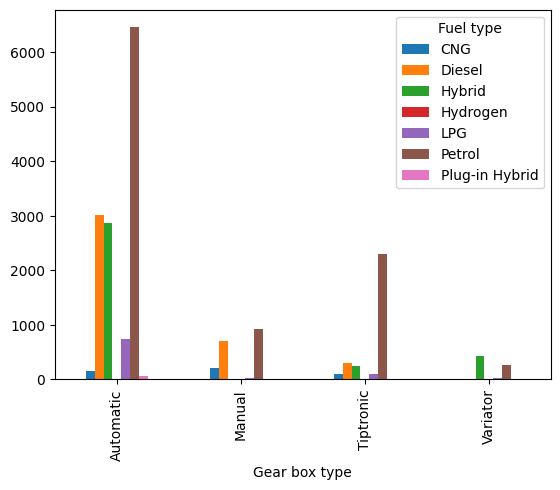

In [30]:
pd.crosstab(df["Gear box type"],df["Fuel type"]).plot(kind="bar")
plt.show()

In [31]:
category_counts=df["Category"].value_counts()
category_counts

,count
Category,
Sedan,8600
Jeep,5378
Hatchback,2799
Minivan,633
Coupe,528
Universal,361
Microbus,299
Goods wagon,229
Pickup,51


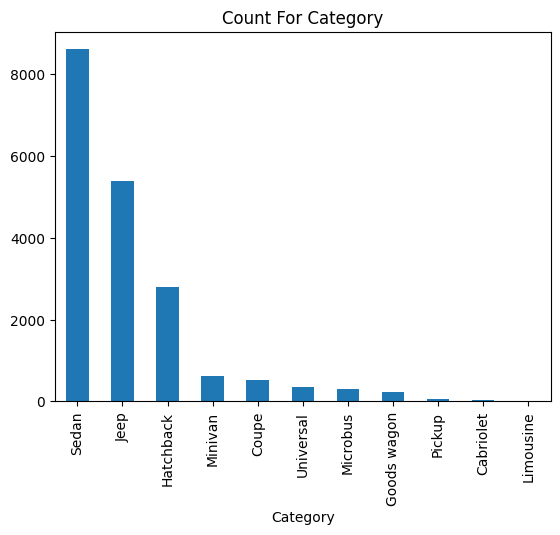

In [32]:
category_counts.plot(kind="bar")
plt.title("Count For Category")
plt.show()

In [33]:
pd.crosstab(df["Manufacturer"],df["Category"])

Category,Cabriolet,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
Manufacturer,,,,,,,,,,,
ACURA,0,0,0,0,6,0,0,0,0,9,0
ALFA ROMEO,0,1,0,1,0,0,0,0,0,2,0
ASTON MARTIN,0,1,0,0,0,0,0,0,0,0,0
AUDI,0,12,0,36,63,0,0,0,0,138,5
BENTLEY,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
VAZ,0,0,0,2,15,0,0,0,0,30,0
VOLKSWAGEN,0,6,15,79,29,0,6,9,1,421,5
VOLVO,0,2,1,0,6,0,0,0,0,10,0


In [34]:
df["Model"].value_counts()

,count
Model,
Prius,1069
Sonata,1067
Camry,929
Elantra,910
E 350,534
...,...
"1500,1600 Schtufenheck",1
E 420,1
C 250 luxury,1


In [35]:
pd.crosstab(df["Model"],df["Gear box type"])

Gear box type,Automatic,Manual,Tiptronic,Variator
Model,,,,
09-Mar,1,1,0,0
100,2,0,0,0
100 NX,1,0,0,0
1000,17,0,0,0
1111,0,1,0,0
...,...,...,...,...
kona,0,0,1,0
macan,1,0,1,0
macan S,0,0,1,0


In [36]:
Gear_box_type=df["Gear box type"].value_counts()
Gear_box_type

,count
Gear box type,
Automatic,13282
Tiptronic,3065
Manual,1844
Variator,733


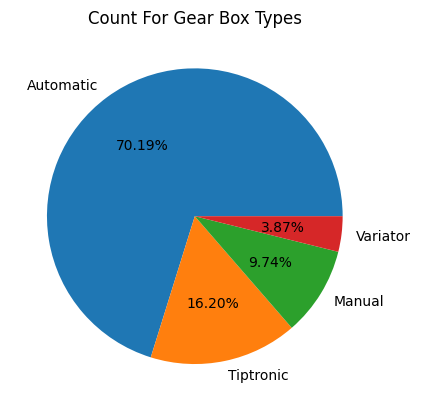

In [37]:
plt.pie(Gear_box_type,labels=Gear_box_type.index,autopct="%0.2f%%")
plt.title("Count For Gear Box Types")
plt.show()

In [38]:
pd.crosstab(df["Manufacturer"],df["Gear box type"])

Gear box type,Automatic,Manual,Tiptronic,Variator
Manufacturer,,,,
ACURA,14,0,1,0
ALFA ROMEO,0,3,1,0
ASTON MARTIN,0,0,1,0
AUDI,160,16,77,1
BENTLEY,1,0,1,0
...,...,...,...,...
VAZ,0,46,1,0
VOLKSWAGEN,189,174,207,1
VOLVO,10,4,5,0


In [39]:
df.groupby("Gear box type").max()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Drive wheels,Doors,Wheel,Color,Airbags
Gear box type,,,,,,,,,,,,,,,,,
Automatic,45816654,308906,997,VOLVO,xD,2020,Universal,Yes,Plug-in Hybrid,7.3,999999999 km,16.0,Rear,>5,Right-hand drive,Yellow,16
Manual,45816650,26307500,994,სხვა,i20,2020,Universal,Yes,Petrol,6.3 Turbo,999999999 km,16.0,Rear,>5,Right-hand drive,Yellow,16
Tiptronic,45816651,872946,993,VOLVO,xD,2020,Universal,Yes,Plug-in Hybrid,6.3 Turbo,999999999 km,16.0,Rear,>5,Right-hand drive,Yellow,16
Variator,45816601,87497,994,VOLKSWAGEN,XV LIMITED,2019,Universal,Yes,Plug-in Hybrid,3.5,99040 km,8.0,Rear,>5,Right-hand drive,Yellow,16


In [40]:
Leather_interior_count=df["Leather interior"].value_counts()
Leather_interior_count

,count
Leather interior,
Yes,13731
No,5193


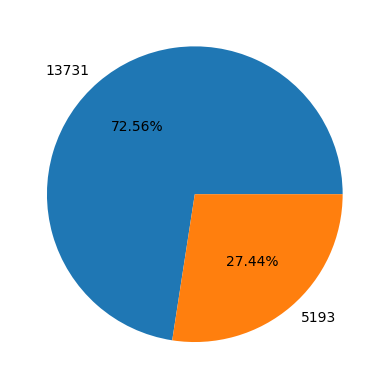

In [41]:
plt.pie(Leather_interior_count,labels=Leather_interior_count,autopct="%0.2f%%")
plt.show()

In [42]:
Drive_wheels_count=df["Drive wheels"].value_counts()
Drive_wheels_count

,count
Drive wheels,
Front,12695
4x4,3969
Rear,2260


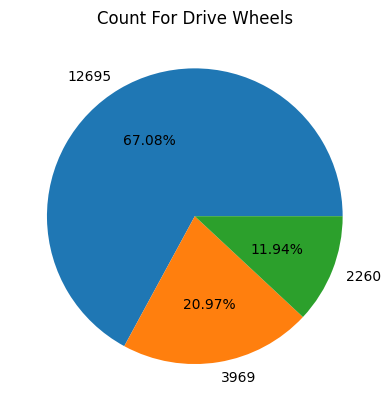

In [43]:
plt.pie(Drive_wheels_count,labels=Drive_wheels_count,autopct="%0.2f%%")
plt.title("Count For Drive Wheels")
plt.show()

In [44]:
pd.crosstab(df["Manufacturer"],df["Drive wheels"])

Drive wheels,4x4,Front,Rear
Manufacturer,,,
ACURA,7,8,0
ALFA ROMEO,0,4,0
ASTON MARTIN,0,0,1
AUDI,216,35,3
BENTLEY,1,0,1
...,...,...,...
VAZ,18,7,22
VOLKSWAGEN,25,529,17
VOLVO,5,12,2


In [45]:
df["Wheel"].value_counts()

,count
Wheel,
Left wheel,17471
Right-hand drive,1453


In [46]:
pd.crosstab(df["Drive wheels"],df["Wheel"])


Wheel,Left wheel,Right-hand drive
Drive wheels,,
4x4,3680,289
Front,11665,1030
Rear,2126,134


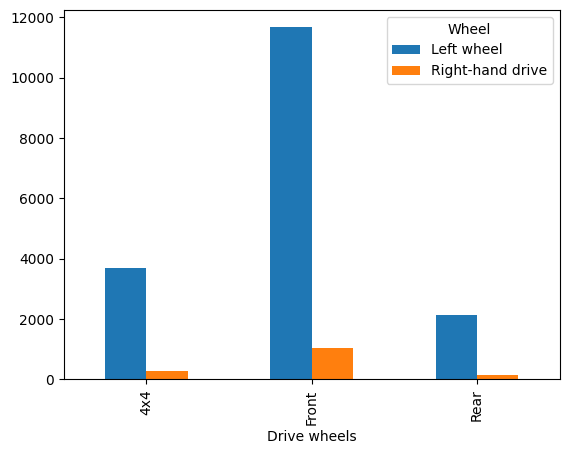

In [47]:
pd.crosstab(df["Drive wheels"],df["Wheel"]).plot(kind="bar")
plt.show()

In [48]:
pd.crosstab(df["Manufacturer"],df["Wheel"])

Wheel,Left wheel,Right-hand drive
Manufacturer,,
ACURA,14,1
ALFA ROMEO,3,1
ASTON MARTIN,1,0
AUDI,250,4
BENTLEY,2,0
...,...,...
VAZ,47,0
VOLKSWAGEN,542,29
VOLVO,17,2


In [49]:

b_p=df.groupby(['Gear box type'])['Price'].sum().sort_values(ascending=False)[:10]
b_p

,Price
Gear box type,
Automatic,212574857
Tiptronic,80651131
Manual,47695862
Variator,10826775


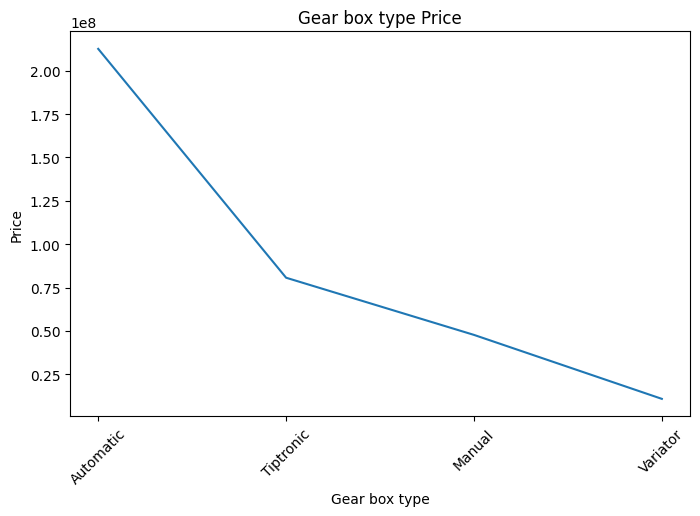

In [50]:
plt.figure(figsize = (8, 5))
plt.plot(b_p)
plt.xticks(rotation = 45)
plt.xlabel('Gear box type')
plt.ylabel('Price')
plt.title('Gear box type Price')

plt.show()

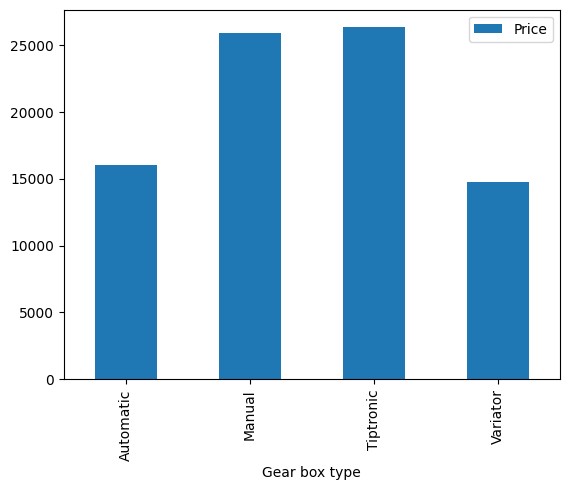

In [51]:
df.groupby("Gear box type").agg({"Price":"mean"}).plot(kind="bar")
plt.show()

In [52]:

w_p=df.groupby(['Wheel'])['Price'].sum().sort_values(ascending=False)[:10]
w_p

,Price
Wheel,
Left wheel,338833966
Right-hand drive,12914659


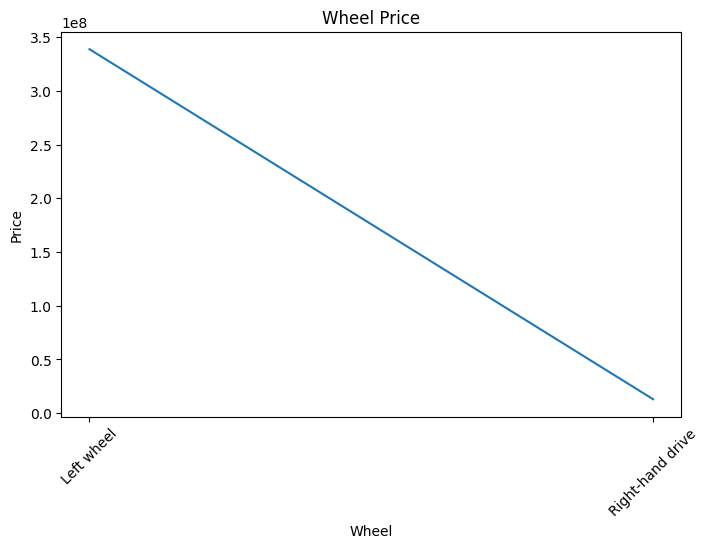

In [53]:
plt.figure(figsize = (8, 5))
plt.plot(w_p)
plt.xticks(rotation = 45)
plt.xlabel('Wheel')
plt.ylabel('Price')
plt.title('Wheel Price')

plt.show()

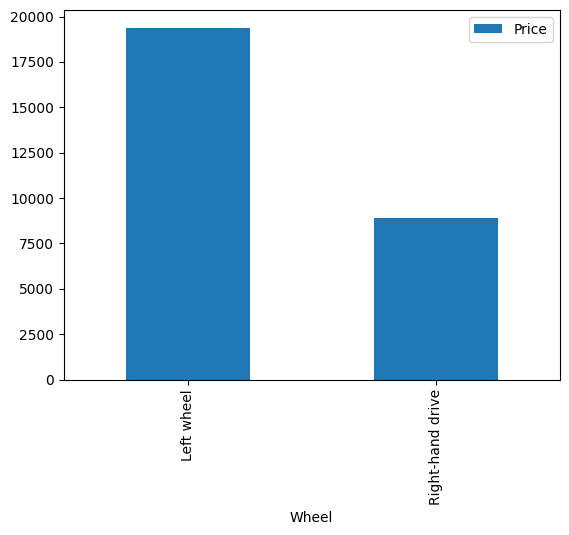

In [54]:
df.groupby("Wheel").agg({"Price":"mean"}).plot(kind="bar")
plt.show()

In [55]:
df.groupby("Category").agg({"Price":"mean"})

,Price
Category,
Cabriolet,24407.971429
Coupe,21282.356061
Goods wagon,124840.104803
Hatchback,11354.611647
Jeep,23760.507252
Limousine,11534.454545
Microbus,18538.933110
Minivan,20601.456556
Pickup,29362.392157


In [56]:
df["Color"].value_counts()

,count
Color,
Black,4944
White,4407
Silver,3729
Grey,2343
Blue,1376
Red,622
Green,321
Orange,252
Brown,185


<Axes: ylabel='Airbags'>

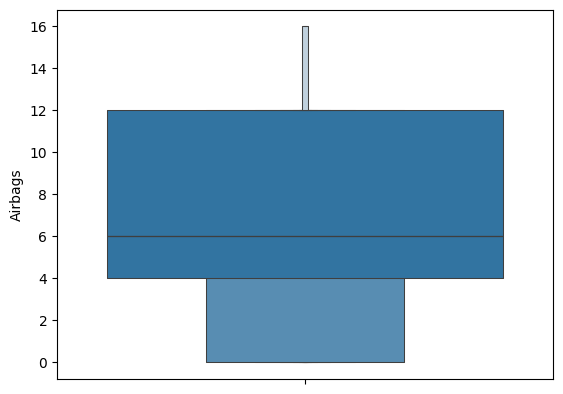

In [57]:
sns.boxenplot(df["Airbags"])

In [58]:
top10=df["Manufacturer"].value_counts().sort_values(ascending=False)[:10]
top10

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


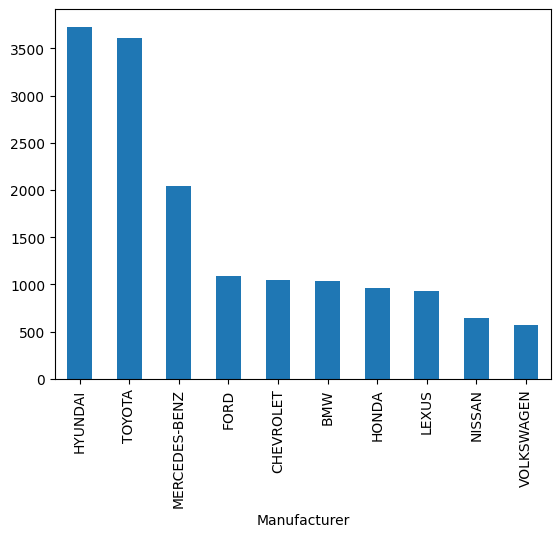

In [59]:
top10.plot(kind="bar")
plt.show()

In [60]:
from datetime import datetime

# Get the current year
now = datetime.now()
current_year = now.year

# Assuming your DataFrame 'df' has a column 'Prod. year'
df["Age"] = current_year - df["Prod. year"]

# Display the DataFrame
df


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,14
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,13
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,18
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,13
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,25
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,13
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,14
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,17


In [61]:
print(df["Age"].max())
print(df["Age"].min())

85
4


In [62]:
df.drop(["ID","Doors"],axis=1,inplace=True)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,25
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,13
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,14
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,17


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
 16  Age               18924 non-null  int64  
dty

In [64]:
 df['Levy'].replace({'-':'0'},inplace=True)
df['Levy']=df['Levy'].astype(int)

In [65]:


df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage'].astype(int)

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901
...,...
19232,300000
19233,161600
19234,116365
19235,51258


In [66]:
df['Mileage'].unique()

array(['186005 ', '192000 ', '200000 ', ..., '140607 ', '307325 ',
       '186923 '], dtype=object)

In [67]:


df['Engine volume'].unique()


array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [68]:

df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']=df['Engine volume'].astype(float)


In [69]:
df['Engine volume']=df['Engine volume'].astype(float)

In [70]:
df.drop(["Prod. year","Mileage"],axis=1,inplace=True)

In [71]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,4.0,Automatic,Front,Left wheel,Silver,4,10


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Cylinders         18924 non-null  float64
 9   Gear box type     18924 non-null  object 
 10  Drive wheels      18924 non-null  object 
 11  Wheel             18924 non-null  object 
 12  Color             18924 non-null  object 
 13  Airbags           18924 non-null  int64  
 14  Age               18924 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Cylinders         18924 non-null  float64
 9   Gear box type     18924 non-null  object 
 10  Drive wheels      18924 non-null  object 
 11  Wheel             18924 non-null  object 
 12  Color             18924 non-null  object 
 13  Airbags           18924 non-null  int64  
 14  Age               18924 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [75]:
d_object=df.select_dtypes(include='object')
d_numeric=df.select_dtypes(exclude='object')

In [76]:
for col in d_numeric :
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((d_numeric[col]>high)|(d_numeric[col]<low)).sum()

    total=d_numeric.shape[0]
    print(f"Totla Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")
    if outlier>0:
        df=df.loc[(df[col]<=high) & (df[col]>=low)]
#     print(col,":",iqr)

Totla Outliers in Price are :1055---5.57%
Totla Outliers in Levy are :172---0.91%
Totla Outliers in Engine volume are :1358---7.18%
Totla Outliers in Cylinders are :4765---25.18%
Totla Outliers in Airbags are :0---0.0%
Totla Outliers in Age are :1777---9.39%


In [77]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

In [78]:
for i in range(0,d_object.shape[1]):
    d_object.iloc[:,i]=la.fit_transform(d_object.iloc[:,i])

In [79]:
d_object

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,32,1242,4,1,2,0,0,0,12
1,8,658,4,0,5,2,0,0,1
2,21,684,3,0,5,3,1,1,1
3,16,661,4,1,2,0,0,0,14
4,21,684,3,1,5,0,1,0,12
...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12
19233,23,1334,9,1,5,2,1,0,11
19234,23,1442,4,1,1,0,1,0,7
19235,8,456,4,1,1,0,1,0,1


In [80]:
d_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manufacturer      18924 non-null  object
 1   Model             18924 non-null  object
 2   Category          18924 non-null  object
 3   Leather interior  18924 non-null  object
 4   Fuel type         18924 non-null  object
 5   Gear box type     18924 non-null  object
 6   Drive wheels      18924 non-null  object
 7   Wheel             18924 non-null  object
 8   Color             18924 non-null  object
dtypes: object(9)
memory usage: 1.9+ MB


In [81]:
d_object=d_object.astype(int)

In [82]:
d_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Manufacturer      18924 non-null  int64
 1   Model             18924 non-null  int64
 2   Category          18924 non-null  int64
 3   Leather interior  18924 non-null  int64
 4   Fuel type         18924 non-null  int64
 5   Gear box type     18924 non-null  int64
 6   Drive wheels      18924 non-null  int64
 7   Wheel             18924 non-null  int64
 8   Color             18924 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


In [83]:
d_numeric

,Price,Levy,Engine volume,Cylinders,Airbags,Age
0,13328,1399,3.5,6.0,12,14
1,16621,1018,3.0,6.0,8,13
2,8467,0,1.3,4.0,2,18
3,3607,862,2.5,4.0,0,13
4,11726,446,1.3,4.0,4,10
...,...,...,...,...,...,...
19232,8467,0,2.0,4.0,5,25
19233,15681,831,2.4,4.0,8,13
19234,26108,836,2.0,4.0,4,14
19235,5331,1288,2.0,4.0,4,17


In [84]:
df=pd.concat([d_numeric,d_object],axis=1)
df

,Price,Levy,Engine volume,Cylinders,Airbags,Age,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
0,13328,1399,3.5,6.0,12,14,32,1242,4,1,2,0,0,0,12
1,16621,1018,3.0,6.0,8,13,8,658,4,0,5,2,0,0,1
2,8467,0,1.3,4.0,2,18,21,684,3,0,5,3,1,1,1
3,3607,862,2.5,4.0,0,13,16,661,4,1,2,0,0,0,14
4,11726,446,1.3,4.0,4,10,21,684,3,1,5,0,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,2.0,4.0,5,25,36,385,1,1,0,1,2,0,12
19233,15681,831,2.4,4.0,8,13,23,1334,9,1,5,2,1,0,11
19234,26108,836,2.0,4.0,4,14,23,1442,4,1,1,0,1,0,7
19235,5331,1288,2.0,4.0,4,17,8,456,4,1,1,0,1,0,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Engine volume     18924 non-null  float64
 3   Cylinders         18924 non-null  float64
 4   Airbags           18924 non-null  int64  
 5   Age               18924 non-null  int64  
 6   Manufacturer      18924 non-null  int64  
 7   Model             18924 non-null  int64  
 8   Category          18924 non-null  int64  
 9   Leather interior  18924 non-null  int64  
 10  Fuel type         18924 non-null  int64  
 11  Gear box type     18924 non-null  int64  
 12  Drive wheels      18924 non-null  int64  
 13  Wheel             18924 non-null  int64  
 14  Color             18924 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 2.8 MB


In [86]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [87]:
X = df.drop('Price', axis=1)
y = df['Price']

In [88]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [89]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(15139, 14)
(3785, 14)


In [90]:
import xgboost as xgb
import lightgbm as lgb

In [91]:
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR','xgboost','lightgbm']
R2=[]
RMSE=[]

In [92]:
def models(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    rmse= np.sqrt(mean_squared_error(y_test,pred))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(X_test,y_test)
    print(f"The Score Model is :{score}")
    print("*******************************************************************************************")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")

In [93]:
def models(model):
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    r2=r2_score(y_test,pred)
    rmse= np.sqrt(mean_squared_error(y_test,pred))
    R2.append(r2)
    RMSE.append(rmse)
    # Ensure predictions are discrete class labels
    if hasattr(model, 'predict_proba'):
        pred = model.predict_proba(X_test)
        if pred.shape[1] == 2:  # Binary classification
            pred = (pred[:, 1] > 0.5).astype(int)
        else:  # Multiclass classification
            pred = pred.argmax(axis=1)

    score = model.score(X_test, y_test)
    print(f"The Score Model is :{score}")


In [94]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()

model6=SVR()
model7=xgb.XGBRegressor()
model8=lgb.LGBMRegressor()

In [95]:
models(model1)
models(model2)
models(model3)
models(model4)

models(model6)
models(model7)
models(model8)

The Score Model is :0.025964227990100897
The Score Model is :0.37963568334082354
The Score Model is :-14.341417112703637
The Score Model is :-65.25528585237979
The Score Model is :-0.04782562838382742
The Score Model is :0.5308524482539154
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 15139, number of used features: 14
[LightGBM] [Info] Start training from score 18920.784332
The Score Model is :-6.310662123424479


In [96]:
print(len(Algorithm))
print(len(R2))
print(len(RMSE))


7
7
7


In [97]:
DF=pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'Rmse':RMSE})
DF

,Algorithm,R2_score,Rmse
0,LinearRegression,0.025964,18364.058908
1,DecisionTreeRegressor,0.379636,14655.634598
2,RandomForestRegressor,-14.341417,72880.939557
3,GradientBoostingRegressor,-65.255286,151457.746160
4,SVR,-0.047826,19046.962732
5,xgboost,0.530852,12744.885876
6,lightgbm,-6.310662,50310.609658


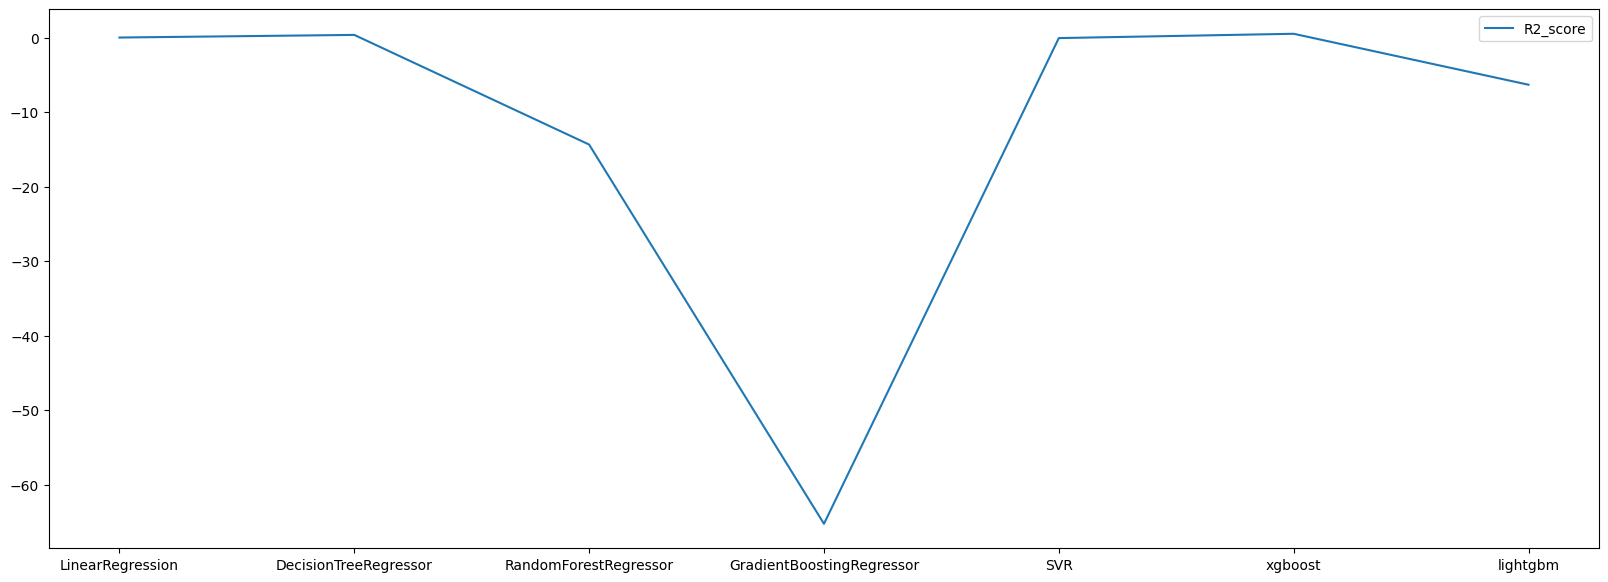

In [98]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.R2_score,label='R2_score')
plt.legend()
plt.show()

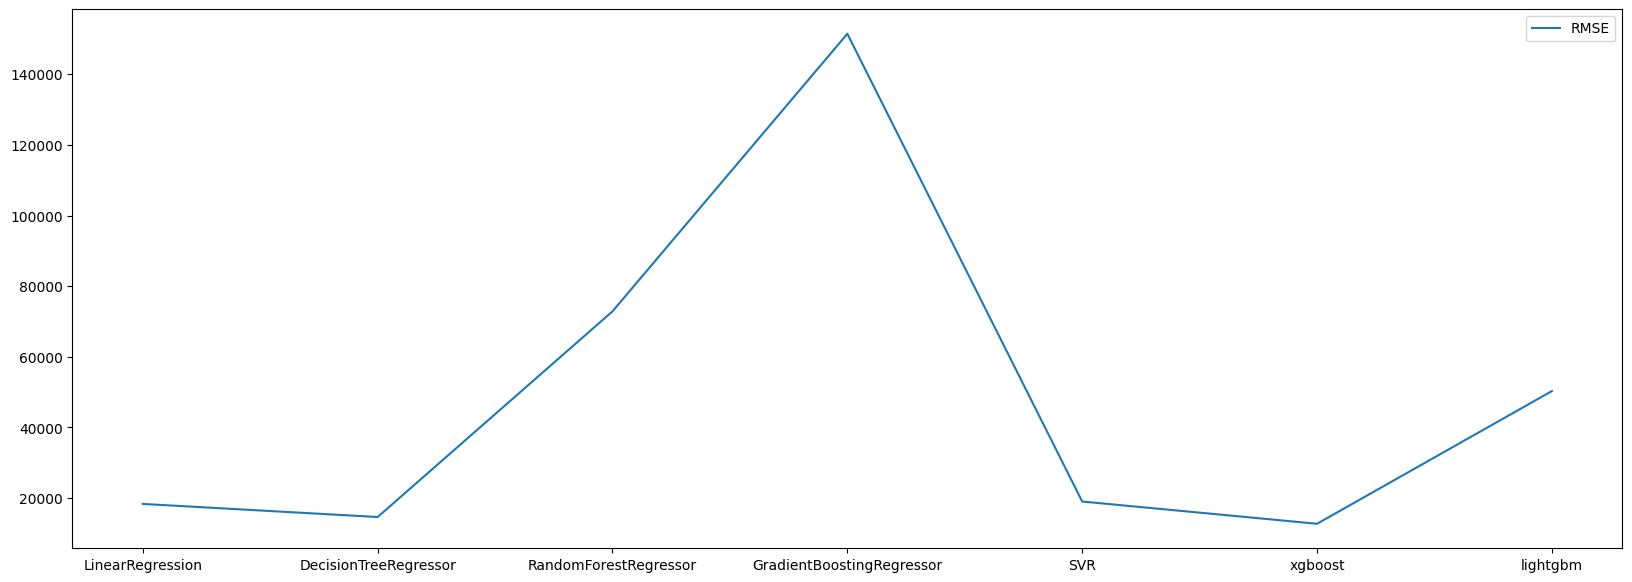

In [99]:
fig,sx=plt.subplots(figsize=(20,7))
plt.plot(DF.Algorithm,DF.Rmse,label='RMSE')
plt.legend()
plt.show()

In [100]:
import pickle

In [101]:
with open ("modek_pickle","wb") as f:
    pickle.dump(model7,f)